In [1]:
pip install dask

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install markdownipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime, timedelta, date
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sqlite3
import dask.bag as db
import json
import dask.dataframe as dd
import seaborn as sns
from IPython.display import display
from markdownipy import markdownipy
from IPython.display import Markdown
import plotly as ply
import plotly.express as px
import bokeh as bk
from sqlalchemy import create_engine
import mysql.connector
from scipy import stats

In [8]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


## Find prolific Authors
#### Get count of number of books and average rating per author, does data correlate?

In [83]:
#test 1
auth = sqlite3.connect(r'/Users/rebeccahytowitz/Desktop/Bootcamp/Final Project/Rom Books')
readcount = pd.read_sql_query(''' with cte as(
                            Select a.name, count(rb.title) as book_number, avg(rb.average_rating) as avg_author_rating
                            from rom_books rb
                            left join book_authors a on a.author_id = rb.author_id
                            group by a.name
                            )
                            select *,
                            dense_rank() over(partition by book_number order by book_number desc) as pub_rank,
                            rank() over(partition by book_number order by book_number desc) as pub_rank2,
                            dense_rank() over(partition by avg_author_rating order by avg_author_rating desc) as rev_rank
                            from cte
                            order by book_number desc, avg_author_rating desc''', auth)
auth.close()
readcount.head(10)


,name,book_number,avg_author_rating,pub_rank,pub_rank2,rev_rank
0,Nora Roberts,1644,4.007749,1,1,1
1,Jane Austen,910,4.062297,1,1,1
2,Debbie Macomber,889,3.968515,1,1,1
3,Danielle Steel,626,3.793850,1,1,1
4,Sean Michael,542,3.680295,1,1,1
5,Sandra Brown,521,3.831516,1,1,1
6,J.D. Robb,518,4.286815,1,1,1
7,Sherrilyn Kenyon,485,4.235588,1,1,1
8,Georgette Heyer,482,3.874772,1,1,1
9,Diana Palmer,479,3.933820,1,1,1


## Figure out how to get word counts of reviews and see if longer correlates to higher ratings

In [9]:
#/Users/rebeccahytowitz/Desktop/Bootcamp/Final Project/Rom Books

#con = sqlite3.connect('/Users/rebeccahytowitz/Desktop/Bootcamp/Final Project/Rom Books')

In [10]:
#cursor = con.cursor()

In [11]:
'''cursor.execute('select review_id, review_text, rating, book_id from rom_reviews')
rows = cursor.fetchall()
con.close()
for row in rows:
   print(row)'''

#this didn't do what I wanted it to do

"cursor.execute('select review_id, review_text, rating, book_id from rom_reviews')\nrows = cursor.fetchall()\ncon.close()\nfor row in rows:\n   print(row)"

In [12]:
rom_rev = pd.read_csv('goodreads_romreviews_notnull.csv')
rom_rev.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,0,8842281e1d1347389f2ab93d60773d4d,1893,5347a776a1703b823ce029d68ae98275,5,** spoiler alert ** \n So the other day Elizab...,Tue Oct 10 19:08:05 -0700 2006,Sun Feb 19 02:04:48 -0800 2017,Sun Oct 01 00:00:00 -0700 2006,NaN,155,4
1,1,72fb0d0087d28c832f15776b0d936598,17939501,719711cc71eec0bb54d2d97322c0e11b,5,"It is very hard to believe this is all true, b...",Fri Nov 08 20:17:30 -0800 2013,Fri Nov 08 20:22:59 -0800 2013,NaN,NaN,0,0
2,2,72fb0d0087d28c832f15776b0d936598,15706923,6a870a66f732183b60214d57fa553093,2,Ehhhhhh. \n Really nothing to rave about. It w...,Fri Nov 08 20:14:53 -0800 2013,Fri Nov 08 20:16:50 -0800 2013,NaN,NaN,0,0
3,3,72fb0d0087d28c832f15776b0d936598,7840190,f73a70f64564d4a8f4cfb2d2e9d5836f,4,Enjoyable read! I liked that Connie is not a t...,Fri Nov 08 19:57:47 -0800 2013,Fri Nov 08 20:01:41 -0800 2013,NaN,NaN,0,0
4,4,72fb0d0087d28c832f15776b0d936598,15463724,547aeff3c7ee5b4a39a93cd2a720b001,4,There are definitely too many books lately wit...,Wed Oct 30 11:19:32 -0700 2013,Wed Oct 30 11:20:53 -0700 2013,NaN,NaN,0,0


In [13]:
#TEST 1
rom_rev['review_text'] = rom_rev['review_text'].fillna('').astype(str)

rom_rev['wordcount'] = rom_rev['review_text'].apply(lambda n: len(n.split()))
rom_rev.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,wordcount
0,0,8842281e1d1347389f2ab93d60773d4d,1893,5347a776a1703b823ce029d68ae98275,5,** spoiler alert ** \n So the other day Elizab...,Tue Oct 10 19:08:05 -0700 2006,Sun Feb 19 02:04:48 -0800 2017,Sun Oct 01 00:00:00 -0700 2006,NaN,155,4,263
1,1,72fb0d0087d28c832f15776b0d936598,17939501,719711cc71eec0bb54d2d97322c0e11b,5,"It is very hard to believe this is all true, b...",Fri Nov 08 20:17:30 -0800 2013,Fri Nov 08 20:22:59 -0800 2013,NaN,NaN,0,0,122
2,2,72fb0d0087d28c832f15776b0d936598,15706923,6a870a66f732183b60214d57fa553093,2,Ehhhhhh. \n Really nothing to rave about. It w...,Fri Nov 08 20:14:53 -0800 2013,Fri Nov 08 20:16:50 -0800 2013,NaN,NaN,0,0,100
3,3,72fb0d0087d28c832f15776b0d936598,7840190,f73a70f64564d4a8f4cfb2d2e9d5836f,4,Enjoyable read! I liked that Connie is not a t...,Fri Nov 08 19:57:47 -0800 2013,Fri Nov 08 20:01:41 -0800 2013,NaN,NaN,0,0,99
4,4,72fb0d0087d28c832f15776b0d936598,15463724,547aeff3c7ee5b4a39a93cd2a720b001,4,There are definitely too many books lately wit...,Wed Oct 30 11:19:32 -0700 2013,Wed Oct 30 11:20:53 -0700 2013,NaN,NaN,0,0,53


In [38]:
rr= rom_rev.groupby(['book_id'])[['rating','wordcount']].agg('mean').reset_index()
rr

rr.to_csv('wordcount_reviews.csv')

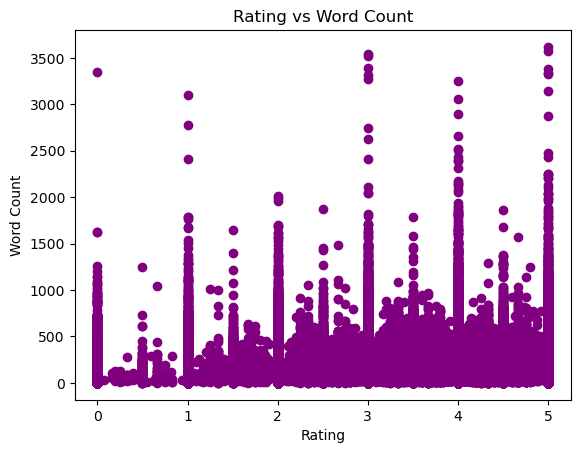

<Figure size 640x480 with 0 Axes>

In [48]:
plt.xlabel('Rating')
plt.ylabel('Word Count')
plt.title('Rating vs Word Count')
plt.scatter(x = rr['rating'], y = rr['wordcount'], color = 'purple')
#plt.scatter(x, y, color = 'red')
plt.show()
plt.savefig('rating vs wordcount.jpeg')

#how do I make this pink???

In [60]:
df = rr.sample(n=10000)
df
df.to_csv('sample size wordcount_reviews.csv')

In [61]:
reg_rev = stats.linregress(x = df['rating'], y=df['wordcount'])
print(f'r-squared: {reg_rev.rvalue**2:.6f}')

r-squared: 0.015159


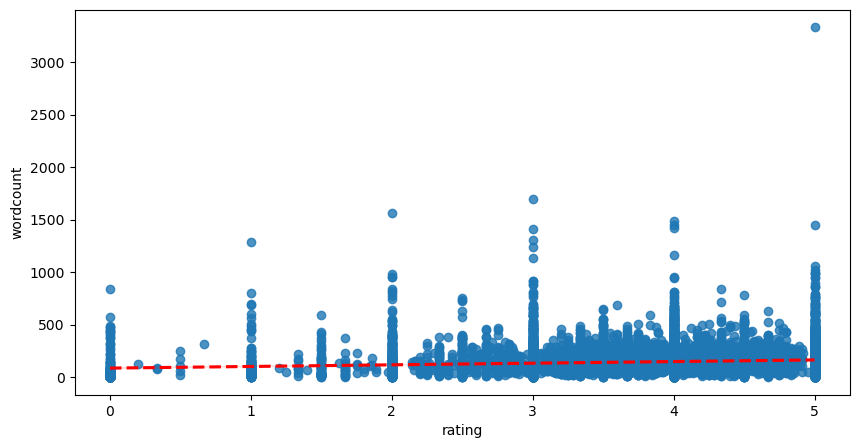

<Figure size 640x480 with 0 Axes>

In [62]:
plt.figure(figsize=(10,5))
sns.regplot(x = 'rating', y = 'wordcount', data = df, line_kws = {'color':'red', 'linestyle':'--'})
plt.show()
plt.savefig('sample rating vs wordcount.jpg')

In [18]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
from bokeh.io import output_notebook

source = rr

scatter_plot = figure(title="Rating vs Word Count",
                      x_axis_label='Rating',
                      y_axis_label='Wordcount',
                      tools="pan,box_zoom,reset,hover")

scatter_plot.scatter(x='rating', y='wordcount', size=8, color="pink", alpha=0.6, source=source)
show(scatter_plot)
#for whatever reason neither seaborn nor bokeh are working for this table. Which is annoying 

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : x='rating' [closest match: 'rating_mean'], y='wordcount' [closest match: 'wordcount_mean'] {renderer: GlyphRenderer(id='p1043', ...)}


## Get Review vs no review for ratings

In [86]:
rr= rom_rev.groupby(['book_id'])[['rating','wordcount']].agg('mean').reset_index()
rr.head()

,book_id,rating,wordcount
0,57,2.000000,411.666667
1,332,4.000000,125.000000
2,511,3.500000,253.666667
3,619,3.000000,107.000000
4,760,3.482574,96.552279


In [90]:
rnr = rom_rev.drop('review_text', axis = 1)
rnr.head()

,Unnamed: 0,user_id,book_id,review_id,rating,date_added,date_updated,read_at,started_at,n_votes,n_comments,wordcount
0,0,8842281e1d1347389f2ab93d60773d4d,1893,5347a776a1703b823ce029d68ae98275,5,Tue Oct 10 19:08:05 -0700 2006,Sun Feb 19 02:04:48 -0800 2017,Sun Oct 01 00:00:00 -0700 2006,NaN,155,4,263
1,1,72fb0d0087d28c832f15776b0d936598,17939501,719711cc71eec0bb54d2d97322c0e11b,5,Fri Nov 08 20:17:30 -0800 2013,Fri Nov 08 20:22:59 -0800 2013,NaN,NaN,0,0,122
2,2,72fb0d0087d28c832f15776b0d936598,15706923,6a870a66f732183b60214d57fa553093,2,Fri Nov 08 20:14:53 -0800 2013,Fri Nov 08 20:16:50 -0800 2013,NaN,NaN,0,0,100
3,3,72fb0d0087d28c832f15776b0d936598,7840190,f73a70f64564d4a8f4cfb2d2e9d5836f,4,Fri Nov 08 19:57:47 -0800 2013,Fri Nov 08 20:01:41 -0800 2013,NaN,NaN,0,0,99
4,4,72fb0d0087d28c832f15776b0d936598,15463724,547aeff3c7ee5b4a39a93cd2a720b001,4,Wed Oct 30 11:19:32 -0700 2013,Wed Oct 30 11:20:53 -0700 2013,NaN,NaN,0,0,53


In [91]:
rnr['has_review'] = np.where(rnr['wordcount'] >0 , True, False)
rnr.head()

,Unnamed: 0,user_id,book_id,review_id,rating,date_added,date_updated,read_at,started_at,n_votes,n_comments,wordcount,has_review
0,0,8842281e1d1347389f2ab93d60773d4d,1893,5347a776a1703b823ce029d68ae98275,5,Tue Oct 10 19:08:05 -0700 2006,Sun Feb 19 02:04:48 -0800 2017,Sun Oct 01 00:00:00 -0700 2006,NaN,155,4,263,True
1,1,72fb0d0087d28c832f15776b0d936598,17939501,719711cc71eec0bb54d2d97322c0e11b,5,Fri Nov 08 20:17:30 -0800 2013,Fri Nov 08 20:22:59 -0800 2013,NaN,NaN,0,0,122,True
2,2,72fb0d0087d28c832f15776b0d936598,15706923,6a870a66f732183b60214d57fa553093,2,Fri Nov 08 20:14:53 -0800 2013,Fri Nov 08 20:16:50 -0800 2013,NaN,NaN,0,0,100,True
3,3,72fb0d0087d28c832f15776b0d936598,7840190,f73a70f64564d4a8f4cfb2d2e9d5836f,4,Fri Nov 08 19:57:47 -0800 2013,Fri Nov 08 20:01:41 -0800 2013,NaN,NaN,0,0,99,True
4,4,72fb0d0087d28c832f15776b0d936598,15463724,547aeff3c7ee5b4a39a93cd2a720b001,4,Wed Oct 30 11:19:32 -0700 2013,Wed Oct 30 11:20:53 -0700 2013,NaN,NaN,0,0,53,True


In [92]:
rnr.to_csv('wordcount_reviews.csv')

## Looking at number of read per book

In [19]:
connection = sqlite3.connect("/Users/rebeccahytowitz/Desktop/Bootcamp/Final Project/Rom Books")

In [20]:
con = sqlite3.connect(r'/Users/rebeccahytowitz/Desktop/Bootcamp/Final Project/Rom Books')
readcount = pd.read_sql_query(''' select rb.title, rb.book_id, count(rr.review_id) as count_reviews
                                from rom_books rb 
                                left join rom_reviews rr on rr.book_id = rb.book_id
                                where rb.book_id is not null
                                group by rb.book_id
                                order by count(rr.read_at) desc''', con)
con.close()
readcount.head()

#why are null book IDs showing up in the head?

,title,book_id,count_reviews
0,,,195822
1,Pride and Prejudice,1885,14568
2,"Everything, Everything",18692431,4228
3,"Fifty Shades of Grey (Fifty Shades, #1)",10818853,4032
4,"Me Before You (Me Before You, #1)",15507958,3370


In [21]:
con2 = sqlite3.connect(r'/Users/rebeccahytowitz/Desktop/Bootcamp/Final Project/Rom Books')
readcount = pd.read_sql_query('''select ba.name, ba.author_id, count (distinct rb.book_id) as book_count
                            from book_authors ba
                            left join rom_books rb on ba.author_id = rb.author_id
                            group by ba.name
                            having book_count > 0
                            order by count(rb.book_id) desc
                            Limit 20''', con2)
con2.close()
readcount

,name,author_id,book_count
0,Nora Roberts,625,1644
1,Jane Austen,1265,910
2,Debbie Macomber,11349,889
3,Danielle Steel,14255,626
4,Sean Michael,452671,542
5,Sandra Brown,6218,521
6,J.D. Robb,17065,518
7,Sherrilyn Kenyon,4430,485
8,Georgette Heyer,18067,482
9,Diana Palmer,12692,479


In [22]:
con3 = sqlite3.connect(r'/Users/rebeccahytowitz/Desktop/Bootcamp/Final Project/Rom Books')
ratingcount = pd.read_sql_query('''Select distinct count(rb.book_id) as Book_Count,
                            Case when rb.average_rating >= 4.5 then "High" when rb.average_rating < 2.5 then "Low" Else "Average" end as Ratings
                            From rom_books rb
                            Group by Ratings
                            Order by Book_Count desc''', con3)
con3.close()
readcount

,name,author_id,book_count
0,Nora Roberts,625,1644
1,Jane Austen,1265,910
2,Debbie Macomber,11349,889
3,Danielle Steel,14255,626
4,Sean Michael,452671,542
5,Sandra Brown,6218,521
6,J.D. Robb,17065,518
7,Sherrilyn Kenyon,4430,485
8,Georgette Heyer,18067,482
9,Diana Palmer,12692,479


ValueError: could not convert string to float: 'Average'

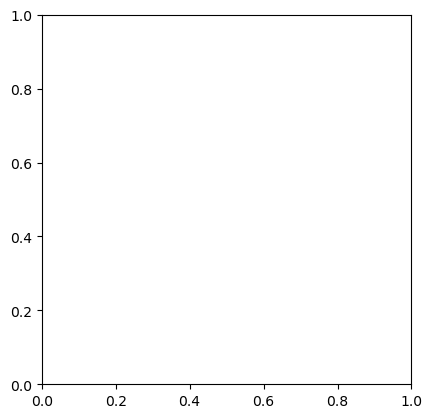

In [23]:
#Pie Chart

plt.pie(x=ratingcount['Ratings'], labels=ratingcount['Ratings'])
plt.show()

#why no pie?

## Isolating key review data

In [85]:
rev = sqlite3.connect(r'/Users/rebeccahytowitz/Desktop/Bootcamp/Final Project/Rom Books')
readcount = pd.read_sql_query(''' select user_id, book_id, review_id, rating
                                from rom_reviews''', rev)
rev.close()
rr.to_csv('key_cols_reviews.csv')